In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
EX = -1
DX = 0.7 
eps = 0.06

U_left = 0
U_right = 1

N_sample = array([-1.011,-0.529,-0.688,-0.196,-1.024,0.292,-0.752,-0.332,-2.590,-0.076, #Выборка из распредления
                  -0.558,-1.296,-1.360,-1.635,-0.830,-0.914,0.853,-0.037,-1.567,-1.359, #N(EX,DX)
                  -1.385,-1.078,0.491,-1.546,-0.466,-1.497,-2.264,-0.750,-1.099,-3.107,
                  -1.137,-2.230,0.339,-1.197,0.249,-1.277,-1.950,-1.202,-2.454,-0.791,
                  -2.530,-1.311, 0.175,-0.045,-0.316,-1.884,-1.648,-1.576,-1.103,-0.750])

U_sample = array([0.376,0.949,0.108,0.289,0.046,0.879,0.513,0.468,0.565,0.837, #Выборка из распределения U(0,1)
                  0.398,0.704,0.402,0.410,0.602,0.440,0.810,0.749,0.082,0.233,
                  0.118,0.983,0.668,0.921,0.766,0.343,0.379,0.687,0.826,0.677])

X = N_sample[:20] #Первые 20 элементов выборки N_sample
Y = N_sample[20:] #Последние 30 элементов выбоки N_sample

# Задание 1. Построить точный доверительный интервал из N_sample для искомого параметра уровня 1-eps.

In [3]:
n = len(N_sample) #Длина выборки
N_sample_mean = np.sum(N_sample) / n #Выборочное среднее
sqrt_DX = np.sqrt(DX) #Корень из дисперсии 
S_2 = np.sum(N_sample ** 2) / n - N_sample_mean ** 2 #Выборочная дисперсия
S_2_0 = (n/(n-1))*S_2 #Несмещенная выборочная дисперсия
S_2_1 = (1/n)*np.sum((N_sample - EX)**2)
print("Выборочное среднее:", N_sample_mean)
print("Выборочная дисперсия:", S_2)
print("Несмещенная выборочная дисперсия:", S_2_0)
print("S_2_1 =",S_2_1)

Выборочное среднее: -1.01896
Выборочная дисперсия: 0.7278671983999996
Несмещенная выборочная дисперсия: 0.7427216310204078
S_2_1 = 0.7282266799999999


### 1)  EX, если DX известно

In [4]:
q = st.norm.ppf(1-eps/2) #Квантиль уровня 1-eps/2 
left_bound = N_sample_mean - q*sqrt_DX/np.sqrt(n)
right_bound = N_sample_mean + q*sqrt_DX/np.sqrt(n)
print("Квантиль стандратного нормального распределения уровня 1-eps/2:", q)
print("Точный доверительный интервал для EX уровня 1-eps, если DX известно - (", left_bound,",",right_bound,")",sep='')

Квантиль стандратного нормального распределения уровня 1-eps/2: 1.8807936081512509
Точный доверительный интервал для EX уровня 1-eps, если DX известно - (-1.241498500827332,-0.7964214991726681)


### 2) EX, если DX неизвестно 

In [5]:
q = st.t.ppf(1-eps/2,n-1)
left_bound = N_sample_mean - (q*S_2)/np.sqrt(n-1)
right_bound = N_sample_mean + (q*S_2)/np.sqrt(n-1)
print("Квантиль распределения Стьюдента с n-1 степенями свободы уровня 1-eps/2:", q)
print("Точный доверительный интервал для EX уровня 1-eps, если DX неизвестно - (", left_bound,",",right_bound,")",sep='')

Квантиль распределения Стьюдента с n-1 степенями свободы уровня 1-eps/2: 1.9253481676850237
Точный доверительный интервал для EX уровня 1-eps, если DX неизвестно - (-1.2191596823939246,-0.8187603176060757)


### 3) DX, если EX известно

In [6]:
q1 = st.chi2.ppf(eps/2,n)
q2 = st.chi2.ppf(1-eps/2,n)
g = np.sum(N_sample ** 2) - 2*EX*np.sum(N_sample) + n*((EX)**2)
left_bound = g/q2
right_bound = g/q1
print("Квантиль распределения Хи-квадрат с n степенями свободы уровня eps/2:", q1)
print("Квантиль распределения Хи-квадрат с n степенями свободы уровня 1-eps/2:", q2)
print("Точный доверительный интервал для DX уровня 1-eps, если EX известно - (", left_bound,",",right_bound,")",sep='')

Квантиль распределения Хи-квадрат с n степенями свободы уровня eps/2: 32.95091163131133
Квантиль распределения Хи-квадрат с n степенями свободы уровня 1-eps/2: 70.4229861231523
Точный доверительный интервал для DX уровня 1-eps, если EX известно - (0.5170376322345324,1.1050175001956677)


### 4) DX, если EX неизвестно

In [7]:
q1 = st.chi2.ppf(eps/2,n-1)
q2 = st.chi2.ppf(1-eps/2,n-1)
left_bound = n*S_2/q2
right_bound = n*S_2/q1
print("Квантиль распределения Хи-квадрат с n-1 степенями свободы уровня eps/2:", q1)
print("Квантиль распределения Хи-квадрат с n-1 степенями свободы уровня 1-eps/2:", q2)
print("Точный доверительный интервал для DX уровня 1-eps, если EX неизвестно - (", left_bound,",",right_bound,")",sep='')

Квантиль распределения Хи-квадрат с n-1 степенями свободы уровня eps/2: 32.140565022641475
Квантиль распределения Хи-квадрат с n-1 степенями свободы уровня 1-eps/2: 69.2331404611865
Точный доверительный интервал для DX уровня 1-eps, если EX неизвестно - (0.5256638609424751,1.132318610278401)


# Задание 2. Проверить гипотезу $H_{0} = \{F = F_{0}\}$, где $F_{0}$ - функция распределения U(0,1) против альтернативы $H_{1} = \{F \neq F_{0}\}$

In [8]:
n = len(U_sample)

### 1)Критерий Колмогорова с вероятностью ошибки первого рода равной eps

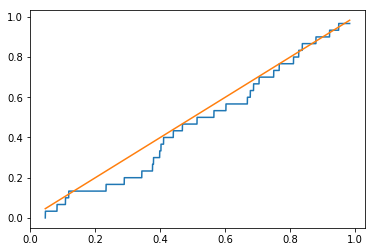

In [9]:
def F_n(t): #Эмпипическая функция распеределения построенная по выборке 
    res = []
    for s in t:
        y = len(U_sample[U_sample < s])
        res.append(y/n)
    if(len(t) == 1):
        return res[0]
    else:
        return array(res)

l = np.min(U_sample) #Первая упорядоченная статистика
r = np.max(U_sample) #n-я упорядоченная статистика
step = 1e-4 #Шаг прорисовки
x = np.arange(l,r,step) 
plt.plot(x,F_n(x))
plt.plot(x,st.uniform.cdf(x))
plt.show()

In [10]:
#Поиск d(F_n,F_0) c шагом step, где F_0 - функция распередления U(0,1) 
D = np.max(np.abs(F_n(x) - st.uniform.cdf(x)))
s = x[np.abs(F_n(x) - st.uniform.cdf(x)) == D][0]
print("d(F_n,F_0) =", D)       
print("при значении F_n(t) =", F_n([s]))
print("где t =", s)

d(F_n,F_0) = 0.14290000000000846
при значении F_n(t) = 0.2
где t = 0.3429000000000085


In [12]:
#Составление критерия Колмогорова
q = st.kstwobign.ppf(1-eps) #(1-eps) - квантиль функции Колмогорова
print("(1-eps) - квантиль функции Колмогорова:", q)
c_eps = q/np.sqrt(n) #Критический уровень
print("Критический уровень с_eps =", c_eps)
D_sqrt_n = np.sqrt(n)*D #Лишнее 
print("d(F_n,F_0) =",D)
if(D <= c_eps):
    print("Принимаем гипотезу H = {F = F_0}, то есть, что выборка имеет распределение U(0,1)")
else:
    print("Принимаем гипотезу H = {F != F_0}, то есть, что выборка имеет распределение отличное от U(0,1)")

(1-eps) - квантиль функции Колмогорова: 1.3241093034128217
Критический уровень с_eps = 0.24174817802721824
d(F_n,F_0) = 0.14290000000000846
Принимаем гипотезу H = {F = F_0}, то есть, что выборка имеет распределение U(0,1)


### 2)Критерий $\chi^{2}$ Пирсона

In [13]:
k = 4 #Количество разбиений 
q = st.chi2.ppf(1-(eps/2),k-1) 
print("(1-eps/2) - квантиль функции распределения Хи-квадрат(k-1):", q)

def P_n(l,r): #Эмпирическое распределение 
    y = len(set(U_sample[U_sample >= l]) & set(U_sample[U_sample <= r]))
    return y/n

l = np.linspace(0, 1, num = k+1)
P_na = array([P_n(l[i-1],l[i]) for i in range(1,k+1)])
P = array([st.uniform.cdf(l[i]) - st.uniform.cdf(l[i-1]) for i in range(1,k+1)])

print("Разбиение есть {",end=' ')
for i in range(1,k+1):
    print("[",l[i-1],",",l[i],")",sep='', end = ' ')
print("}")

c_eps = q/n #Критический уровень при вероятности ошибки первого рода равной eps
print("Критический уровень при вероятности ошибки первого рода равной eps:", c_eps)

D = np.sum(((P_na - P)**2)/P) #d(P_n,P)
print("d(P_n,P_0) =", D)

if(D <= c_eps):
    print("Принимаем гипотезу H = {F = F_0}, то есть, что выборка имеет распределение U(0,1)")
else:
    print("Принимаем гипотезу H = {F != F_0}, то есть, что выборка имеет распределение отличное от U(0,1)")

(1-eps/2) - квантиль функции распределения Хи-квадрат(k-1): 8.947287498879447
Разбиение есть { [0.0,0.25) [0.25,0.5) [0.5,0.75) [0.75,1.0) }
Критический уровень при вероятности ошибки первого рода равной eps: 0.2982429166293149
d(P_n,P_0) = 0.04
Принимаем гипотезу H = {F = F_0}, то есть, что выборка имеет распределение U(0,1)


# Задание 3. Проверить гипотезы о равенстве средних и дисперсий двух выборок из нормального распределения

In [14]:
n = len(X)
m = len(Y)

X_mean = np.sum(X) / n
Y_mean = np.sum(Y) / m

S_2_X = (np.sum(X**2)/n - X_mean**2)
S_2_Y = (np.sum(Y**2)/m - Y_mean**2)

print("Выборочное среднее выборки X:",X_mean)
print("Выборочное среднее выборки Y:",Y_mean)
print("Выборочная дисперсия выборки X:",S_2_X)
print("Выборочная дисперсия выборки Y:",S_2_Y)

Выборочное среднее выборки X: -0.78045
Выборочное среднее выборки Y: -1.1779666666666666
Выборочная дисперсия выборки X: 0.5612285475000001
Выборочная дисперсия выборки Y: 0.7757518322222223


### Проверка гипотезы о совпадении дисперсий по критерию Фишера

In [15]:
q1 = st.f.ppf(eps/2, n-1,m-1)
q2 = st.f.ppf(1-eps/2, n-1,m-1)

print("eps/2 квантиль функции распредления Фишера:", q1)
print("(1-eps/2) квантиль функции распредления Фишера:", q2)

F = ((m-1)*n*S_2_X)/((n-1)*m*S_2_Y)
print("F =",F)

if F > q1 and F < q2:
    print("F принадлежит F(n-1,m-1), значит принимаем гипотезу о равенстве дисперсий")
else:
    print("F не принадлежит F(n-1,m-1), значит принимаем альтернативу о неравенстве дисперсий")

eps/2 квантиль функции распредления Фишера: 0.4319289028961991
(1-eps/2) квантиль функции распредления Фишера: 2.1591845537864742
F = 0.736156382296279
F принадлежит F(n-1,m-1), значит принимаем гипотезу о равенстве дисперсий


### Проверка гипотезы о равенстве средних по критерию Стьюдента, в предположении равенства дисперсий

In [16]:
q = st.t.ppf(1-eps/2, n+m-2)

print("eps/2 квантиль функции распредления Стьюдента:", -q)
print("(1-eps/2) квантиль функции распредления Стьюдента:", q)

F = (X_mean - Y_mean)/(np.sqrt(1/n+1/m)*np.sqrt((n*S_2_X + m*S_2_Y)/(n+m-2)))
print("F =",F)

if F > -q and F < q:
    print("F принадлежит T(n+m-2), значит принимаем гипотезу о равенстве средних")
else:
    print("F не принадлежит T(n+m-2), значит принимаем альтернативу о неравенстве средних")

eps/2 квантиль функции распредления Стьюдента: -1.9262983445478956
(1-eps/2) квантиль функции распредления Стьюдента: 1.9262983445478956
F = 1.6243332215909174
F принадлежит T(n+m-2), значит принимаем гипотезу о равенстве средних
